<a href="https://colab.research.google.com/github/Naiker911/Machine-learning/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание задания:

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Проведите первичный разведочный анализ данных.
a) Проверьте данные на пропуски.
b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
c) Визуализируйте распределение количества флагов по религиям.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите любую модель классификации на выбор.
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a) Сделайте выводы.
7. Обработайте выбросы в данных.
a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.
8. Проведите нормализацию признаков.
a) Выберите признаки для нормализации, предложите способы для их обработки.
9. Повторите п. 4, п. 5.
10. Сбалансируйте классы путем oversampling/undersampling.
a) Повторите п. 4, п. 5.
11. Уменьшите размерность пространства признаков.
a) Повторите п. 4, п. 5.
12. Примените любой метод на ваше усмотрение для отбора признаков.
a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.
13. Оптимизируйте параметры модели из п. 4.
a) Повторите п. 4, п. 5.
14. Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.
15. Выберите результат с лучшими метриками и постройте для него Confusion Matrix.
16. *Творческий пункт. Предложите что-то интересное для датасета.
17. Сделайте выводы.

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
with open('/content/drive/Othercomputers/Ноутбук/Data Scense/Flags/flag.names', 'r') as val:
    lines = [line.rstrip('\n') for line in val]
    print(*lines, sep='\n')

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

In [ ]:
header = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours',
          'red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires',
          'quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
assert len(header) == 30

In [ ]:
data = pd.read_csv('/content/drive/Othercomputers/Ноутбук/Data Scense/Flags/flag.data', names=header, sep=',')
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [ ]:
data['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

Для лучшей интерпритации результатов до преобразования категориальных признаков, заменим циферные обозначения категорий, на буквенные, в соответствии с описанием датасета. Для целевого признак сделаем дубликат колонки, но с буквенным обозначением

In [ ]:
landmass = {
    1: 'N.America',
    2: 'S.America',
    3: 'Europe',
    4: 'Africa',
    5: 'Asia',
    6: 'Oceania',
}
zone = {
    1: 'NE',
    2: 'SE',
    3: 'SW',
    4: 'NW',
}
language = {
    1: 'English',
    2: 'Spanish',
    3: 'French',
    4: 'German',
    5: 'Slavic',
    6: 'Other Indo-European',
    7: 'Chinese',
    8: 'Arabic',
    9: 'Japanese/Turkish/Finnish/Magyar',
    10: 'Others',
}
religion = {
    0: 'Catholic',
    1: 'Other Christian',
    2: 'Muslim',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Ethnic',
    6: 'Marxist',
    7: 'Others',
}

In [ ]:
data['landmass'] = data['landmass'].apply(lambda x: landmass[x])
data['zone'] = data['zone'].apply(lambda x: zone[x])
data['language'] = data['language'].apply(lambda x: language[x])
data['new_religion'] = data['religion'].apply(lambda x: religion[x])

In [ ]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,new_religion
0,Afghanistan,Asia,NE,648,16,Others,2,0,3,5,...,0,1,0,0,1,0,0,black,green,Muslim
1,Albania,Europe,NE,29,3,Other Indo-European,6,0,0,3,...,0,1,0,0,0,1,0,red,red,Marxist
2,Algeria,Africa,NE,2388,20,Arabic,2,2,0,3,...,0,1,1,0,0,0,0,green,white,Muslim
3,American-Samoa,Oceania,SW,0,0,English,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,Other Christian
4,Andorra,Europe,NE,0,0,Other Indo-European,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,Catholic


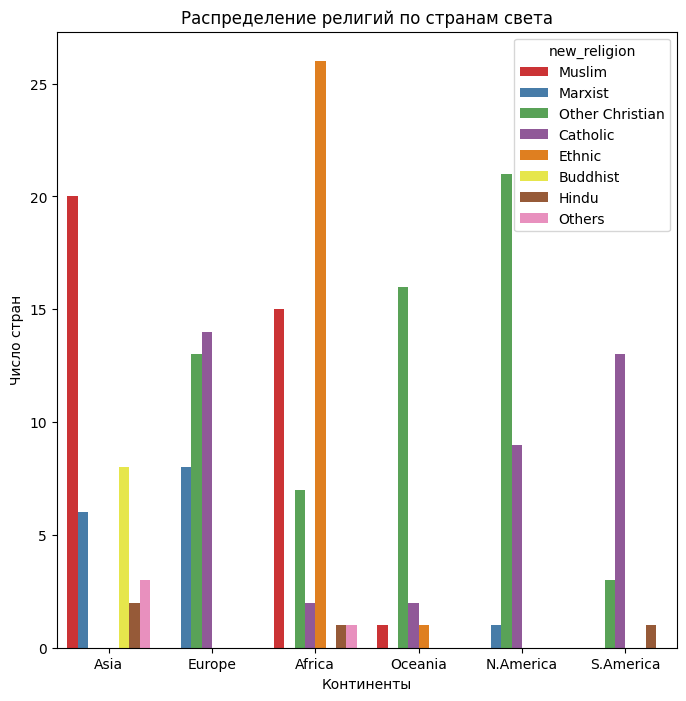

In [ ]:
plt.figure(figsize=[8, 8])
diag = sns.countplot(x='landmass', hue='new_religion', data=data, palette='Set1')
diag.set_xlabel('Континенты')
diag.set_ylabel('Число стран')
diag.set_title('Распределение религий по странам света')
plt.show()

Вывод: по графику мы можем наблюдать сколько стран с той или иной религией находятся на разных континентах. На графике наглядно наблюдается несбалансированность классов целевого признака, а также то, что признак landmass сильно скоррелирован с целевым признаком.

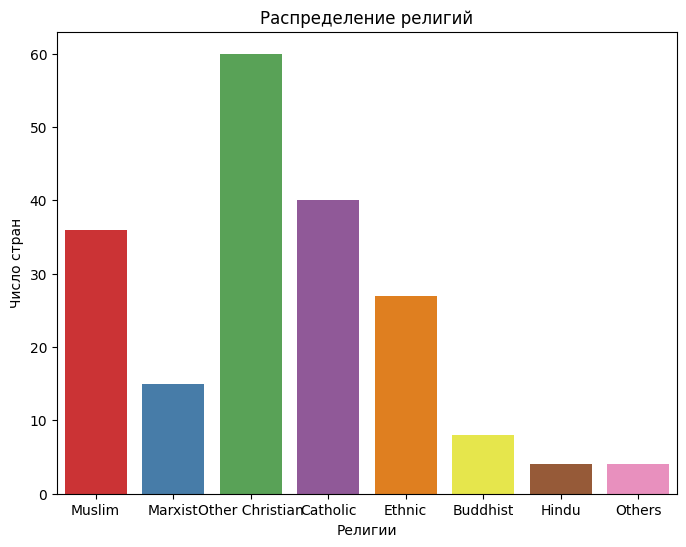

In [ ]:
plt.figure(figsize=[8, 6])
diag = sns.countplot(x='new_religion', data=data, palette='Set1')
diag.set_xlabel('Религии')
diag.set_ylabel('Число стран')
diag.set_title('Распределение религий')
plt.show()

In [ ]:
dummies = pd.get_dummies(data[['landmass', 'zone', 'language', 'mainhue', 'topleft', 'botright']])

In [ ]:
dummies.head()

,landmass_Africa,landmass_Asia,landmass_Europe,landmass_N.America,landmass_Oceania,landmass_S.America,zone_NE,zone_NW,zone_SE,zone_SW,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data = data.drop(columns=['name', 'landmass', 'zone', 'language', 'mainhue', 'topleft', 'botright', 'new_religion'])
data = pd.concat([data, dummies], axis=1)
data.head()

,area,population,religion,bars,stripes,colours,red,green,blue,gold,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648,16,2,0,3,5,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,29,3,6,0,0,3,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,2388,20,2,2,0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,5,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,3,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 66 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   area                                      194 non-null    int64
 1   population                                194 non-null    int64
 2   religion                                  194 non-null    int64
 3   bars                                      194 non-null    int64
 4   stripes                                   194 non-null    int64
 5   colours                                   194 non-null    int64
 6   red                                       194 non-null    int64
 7   green                                     194 non-null    int64
 8   blue                                      194 non-null    int64
 9   gold                                      194 non-null    int64
 10  white                                     194 non-null    int6

Разбивка датасета на train и test, используя StratifiedShuffleSplit

In [ ]:
y = data['religion']
X = data.drop(columns=['religion'])

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=.2)
for trn_ind, tst_ind in sss.split(X, y):
    X_train, y_train = X.iloc[trn_ind], y.iloc[trn_ind]
    X_test, y_test = X.iloc[tst_ind], y.iloc[tst_ind]

assert len(X_train) + len(X_test) == len(y_train) + len(y_test) == len(X) == len(y)

Обучение модели RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.73      0.92      0.81        12
           2       0.71      0.71      0.71         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       0.33      0.33      0.33         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.40      0.42      0.41        39
weighted avg       0.62      0.67      0.64        39



Вывод: без использования Feature engineering модель показывает не самую высокую точность 0.67. Также мы видим проблему с определением классов 4 и 7 - это связано с очень маленьким количеством записей по этим классам: по 4 записи на класс.

Построение корреляционной матрицы

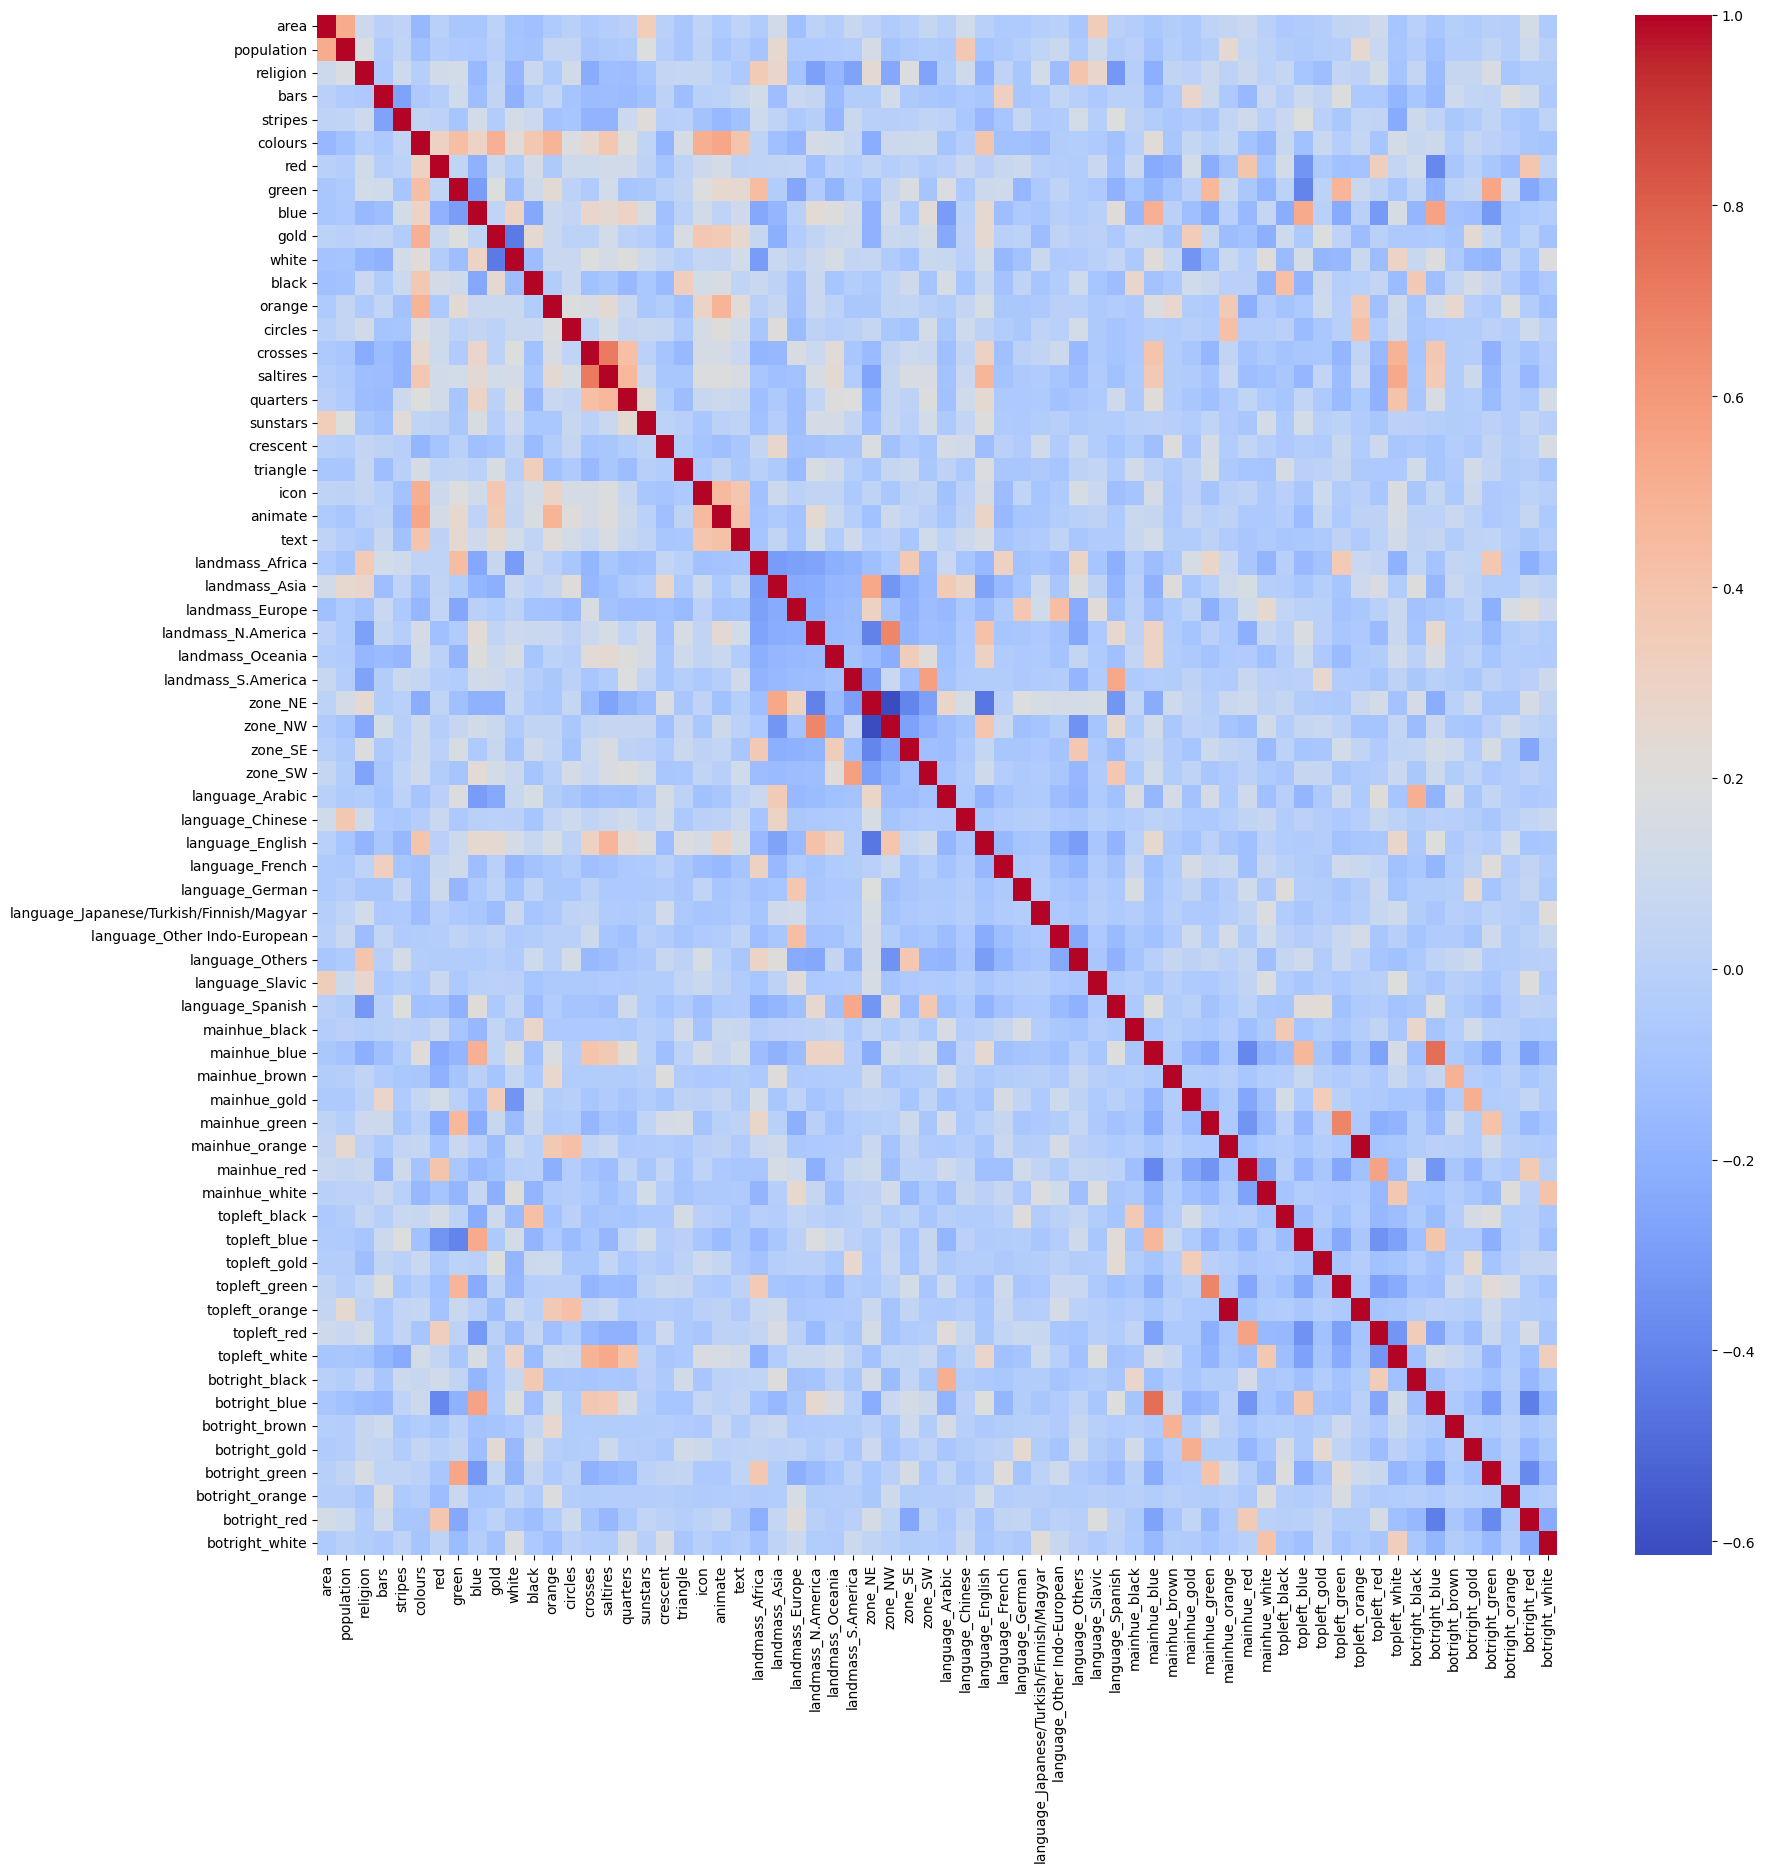

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.corr()[['religion']].sort_values(by='religion', ascending = False))

                                          religion
religion                                  1.000000
language_Others                           0.396316
landmass_Africa                           0.362746
landmass_Asia                             0.272532
language_Slavic                           0.268847
zone_NE                                   0.239376
zone_SE                                   0.186126
population                                0.172731
botright_green                            0.157238
topleft_red                               0.134565
green                                     0.128843
language_Japanese/Turkish/Finnish/Magyar  0.127693
circles                                   0.123260
red                                       0.121721
language_Chinese                          0.110049
stripes                                   0.103222
mainhue_green                             0.089556
area                                      0.087941
mainhue_red                    

Вывод: Из корреляционной матрицы мы видим, что у нас присутствует немалое количество скоррелированных признаков. Также мы видим, что у нас присутствует много признаков, которые совсем слабо скоррелированы с целевым признаком

Работа с выбросами
При работе с выбросами исключим записи с ключевыми классами 4, 7, 8

In [ ]:
temp_data = data[(data['religion'] == 4) | (data['religion'] == 7) | (data['religion'] == 3)]
temp_data

,area,population,religion,bars,stripes,colours,red,green,blue,gold,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
20,47,1,3,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28,678,35,3,0,0,3,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
75,215,1,4,0,0,5,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
78,1,5,3,0,0,6,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0
81,3268,684,4,0,3,4,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
86,21,4,7,0,2,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
90,372,118,7,0,0,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
92,181,6,3,0,0,2,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
111,2,1,4,0,4,4,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
120,140,16,4,0,0,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_data = data[(data['religion'] != 4) & (data['religion'] != 7) & (data['religion'] != 3)]

In [ ]:
def make_plot(column):
    sns.boxplot(new_data[column], orient='h')
    sns.displot(new_data[column])

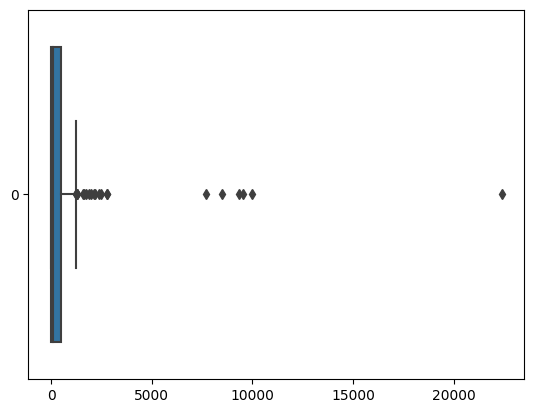

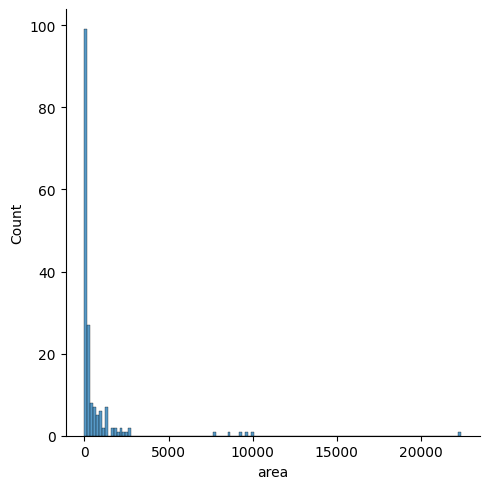

In [ ]:
make_plot('area')

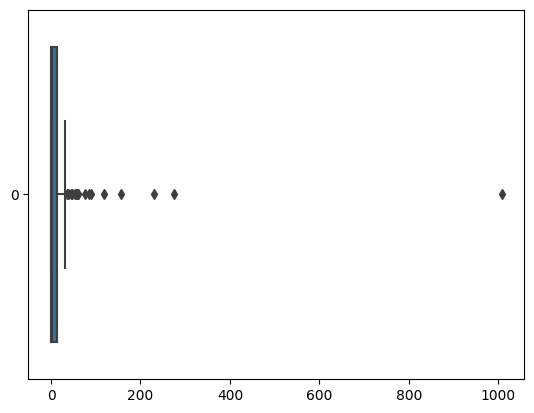

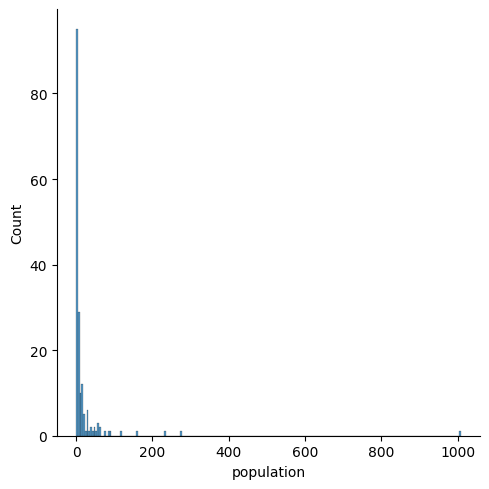

In [ ]:
make_plot('population')

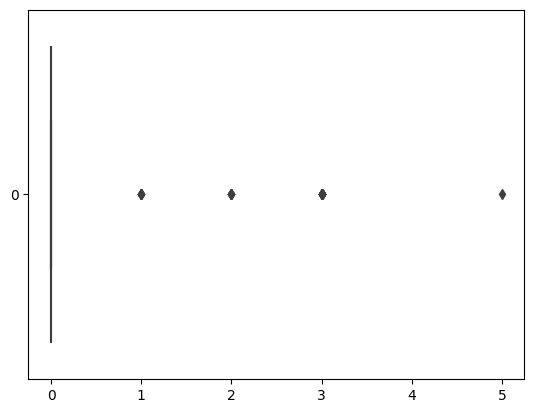

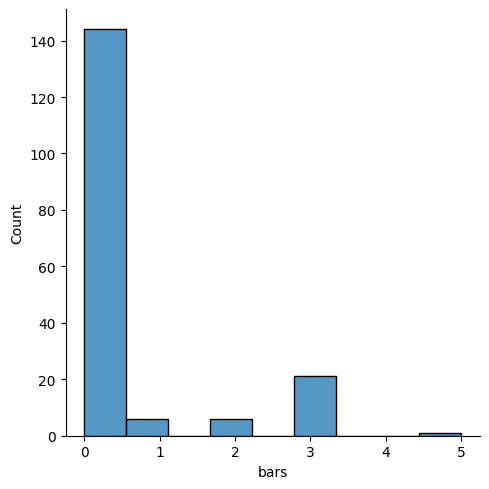

In [ ]:
make_plot('bars')

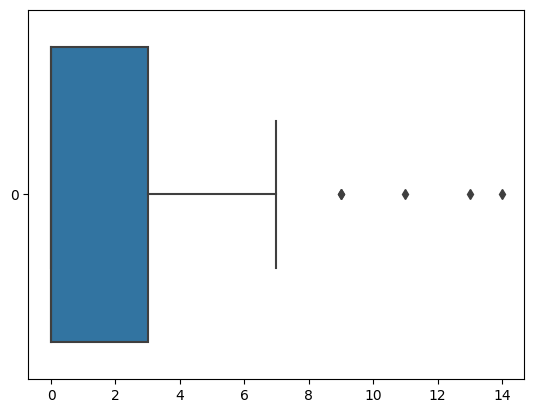

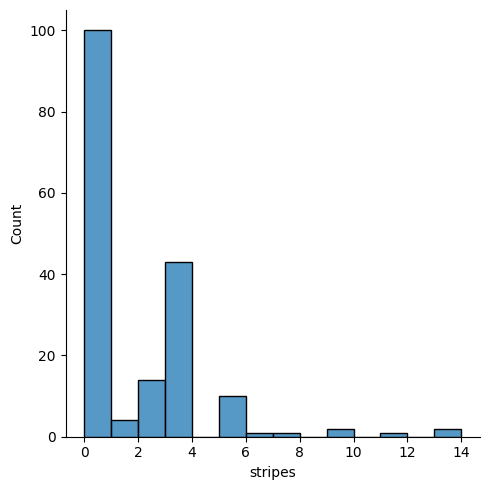

In [ ]:
make_plot('stripes')

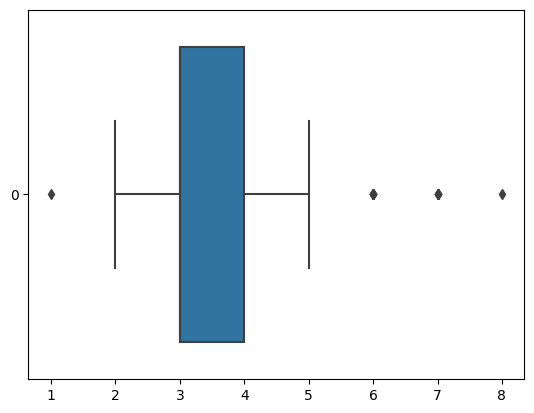

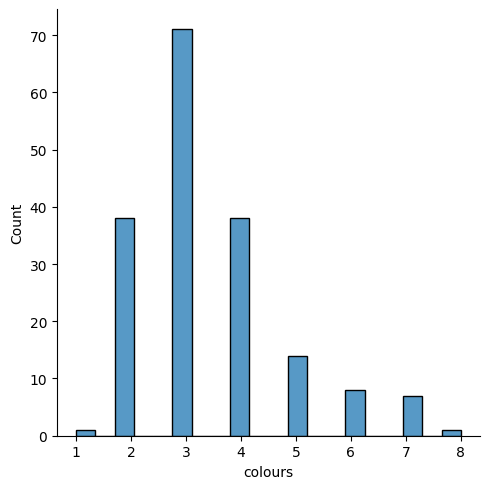

In [ ]:
make_plot('colours')

In [ ]:
data_clear = new_data[(new_data['colours'] >= 2) & (new_data['colours'] <= 7)]
data_clear = data_clear[data_clear['stripes'] <= 12]
data_clear = data_clear[data_clear['bars'] <= 4]
data_clear = data_clear[data_clear['population'] <= 200]
data_clear = data_clear[data_clear['area'] <= 5000]
data_clear = pd.concat([data_clear, temp_data], axis=0)

In [ ]:
data_clear['religion'].value_counts()

1    55
0    39
2    34
5    27
6    13
3     8
4     4
7     4
Name: religion, dtype: int64

In [ ]:
for value in data['religion'].unique():
  outliers_percent = round(100 - (data_clear[data_clear['religion'] == value].size / data[data['religion'] == value].size * 100), 2)
  print(f'Число удалённых выбросов для класса {value} составило {outliers_percent}%')

Число удалённых выбросов для класса 2 составило 5.56%
Число удалённых выбросов для класса 6 составило 13.33%
Число удалённых выбросов для класса 1 составило 8.33%
Число удалённых выбросов для класса 0 составило 2.5%
Число удалённых выбросов для класса 5 составило 0.0%
Число удалённых выбросов для класса 3 составило 0.0%
Число удалённых выбросов для класса 4 составило 0.0%
Число удалённых выбросов для класса 7 составило 0.0%


In [ ]:
y = data_clear['religion']
X = data_clear.drop(columns=['religion'])

for trn_ind, tst_ind in sss.split(X, y):
    X_train, y_train = X.iloc[trn_ind], y.iloc[trn_ind]
    X_test, y_test = X.iloc[tst_ind], y.iloc[tst_ind]

assert len(X_train) + len(X_test) == len(y_train) + len(y_test) == len(X) == len(y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.77      0.91      0.83        11
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.65        37
   macro avg       0.40      0.40      0.39        37
weighted avg       0.62      0.65      0.63        37



Вывод: после очистки данных от выбросов, мы видим существенное увеличение качества модели

Нормализация признаков

In [ ]:
data_clear.describe()

,area,population,religion,bars,stripes,colours,red,green,blue,gold,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,359.722826,15.364130,2.195652,0.440217,1.478261,3.472826,0.793478,0.472826,0.505435,0.461957,...,0.282609,0.217391,0.048913,0.250000,0.010870,0.048913,0.201087,0.005435,0.347826,0.086957
std,598.769662,53.976751,2.063151,1.000935,2.013497,1.262888,0.405914,0.500623,0.501335,0.499911,...,0.451496,0.413596,0.216275,0.434194,0.103972,0.216275,0.401907,0.073721,0.477580,0.282540
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105.500000,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,414.000000,13.250000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3268.000000,684.000000,7.000000,3.000000,11.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scale = RobustScaler()

scale_data = scale.fit_transform(data_clear[['area', 'population']])
standard_df = pd.DataFrame(scale_data, columns=['area', 'population'])
standard_df.head()

,area,population
0,1.328843,0.981132
1,-0.187385,0.000000
2,5.590937,1.283019
3,-0.258420,-0.226415
4,-0.258420,-0.226415


In [ ]:
data_clear = data_clear.drop(columns=['area', 'population'])
data_clear = pd.concat([data_clear.reset_index(drop=True), standard_df.reset_index(drop=True)], axis=1)
data_clear.head()

,religion,bars,stripes,colours,red,green,blue,gold,white,black,...,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,area,population
0,2,0,3,5,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,1.328843,0.981132
1,6,0,0,3,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,-0.187385,0.000000
2,2,2,0,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,5.590937,1.283019
3,1,0,0,5,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,-0.258420,-0.226415
4,0,3,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,-0.258420,-0.226415


In [ ]:
y = data_clear['religion']
X = data_clear.drop(columns=['religion'])

for trn_ind, tst_ind in sss.split(X, y):
    X_train, y_train = X.iloc[trn_ind], y.iloc[trn_ind]
    X_test, y_test = X.iloc[tst_ind], y.iloc[tst_ind]

assert len(X_train) + len(X_test) == len(y_train) + len(y_test) == len(X) == len(y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.69      0.82      0.75        11
           2       0.75      0.86      0.80         7
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1

    accuracy                           0.73        37
   macro avg       0.55      0.56      0.52        37
weighted avg       0.71      0.73      0.70        37



Вывод: Нормализация признаков population и area позволила поднять ещё качество модели

Балансировка классов методом Oversampling

In [ ]:
classes_count = y.value_counts()
max_class_count = classes_count.max()

X_over = X.copy()
y_over = y.copy()

In [ ]:
for cls in zip(classes_count, classes_count.index):
    if cls[0] != max_class_count:
        ind = np.random.choice(y[y==cls[1]].index, size = max_class_count - cls[0])
        X_add = X.iloc[ind]
        y_add = y.iloc[ind]
        X_over = X_over.append(X_add)
        y_over = y_over.append(y_add)

In [ ]:
y_over.value_counts()

2    55
6    55
1    55
0    55
5    55
3    55
4    55
7    55
Name: religion, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=.2, random_state=21)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       1.00      0.57      0.73        14
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        12
           5       0.57      0.89      0.70         9
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        11

    accuracy                           0.89        88
   macro avg       0.90      0.90      0.89        88
weighted avg       0.91      0.89      0.89        88



Вывод: Мы видим очень сильное увеличение качества модели

Уменьшение размерности пространства признаков

In [ ]:
X_over.shape

(440, 65)

In [ ]:
X_pca = pd.DataFrame(PCA(n_components = round(len(X_over.columns)/2)).fit_transform(X_over))

In [ ]:
X_pca.shape

(440, 32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_over, test_size=.2, random_state=21)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.70      0.50      0.58        14
           2       0.88      0.70      0.78        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        12
           5       0.57      0.89      0.70         9
           6       0.92      1.00      0.96        11
           7       0.92      1.00      0.96        11

    accuracy                           0.85        88
   macro avg       0.86      0.86      0.85        88
weighted avg       0.86      0.85      0.85        88



Вывод: Применение метода PCA для снижения размерности признаков позволило сократить количество признаков с 65 до 32, сохранив при этом качество модели

Отбор признаков с помощью SelectKBest

In [ ]:
select = SelectKBest(k=16)
X_skbest = select.fit_transform(X_over, y_over)
X_train, X_test, y_train, y_test = train_test_split(X_skbest, y_over, test_size=.2, random_state=21)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       1.00      0.64      0.78        14
           2       1.00      0.50      0.67        10
           3       0.80      0.80      0.80        10
           4       0.75      1.00      0.86        12
           5       0.73      0.89      0.80         9
           6       0.56      0.91      0.69        11
           7       0.73      1.00      0.85        11

    accuracy                           0.75        88
   macro avg       0.79      0.75      0.73        88
weighted avg       0.80      0.75      0.73        88



Вывод: возможно сократить с помощью метода SelectKBest число признаков с 65 до 16, с небольшой потерей в качества модели

Оптимизация параметров модели

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_over, test_size=.2, random_state=21)

In [ ]:
parameters = {
    'n_estimators':[10, 25, 50, 100, 150, 200, 500, 1000],
    'criterion':['gini', 'entropy'],
    'max_depth':[3, 5, 7, 9, 11, 15, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'random_state': [21],
}

In [ ]:
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 3,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 500,
 'random_state': 21}

Обучение стекинг трех моделей, включая модель с оптимизированными параметрами

In [ ]:
model = StackingClassifier([
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier(
        criterion='entropy',
        max_depth=7,
        min_samples_leaf= 1,
        n_estimators=100)),
    ('SVR', LinearSVC(random_state=21))
    ], final_estimator=LogisticRegression(solver='lbfgs', max_iter=10000))

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = classification_report(y_test, pred, zero_division=0)
print(score)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.64      0.72        14
           2       0.78      0.70      0.74        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        12
           5       0.80      0.89      0.84         9
           6       0.92      1.00      0.96        11
           7       0.85      1.00      0.92        11

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.87      0.88      0.87        88



Вывод: Применение стекинга трёх моделей мозволило ещё улучшить качество модели

Построение матрицы ошибок

In [ ]:
confusion_matrix(y_test, pred)

array([[ 9,  1,  1,  0,  0,  0,  0,  0],
       [ 2,  9,  1,  0,  0,  1,  1,  0],
       [ 0,  1,  7,  0,  0,  1,  0,  1],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11]])

Выводы:
В рамках работы были применены различные методы улучшения качества модели RandomForestClassifier для решения задачи классификации целевого признака:

приведение категориальных признаков
исключены выбросы
балансировка классов методом Oversampling
нормализованы признаки
уменьшение размерности пространства признаков
произведен отбор признаков
оптимизация параметров модели
обучение стекинг трех моделей
Результатом работы стало улучшения качества модели accuracy с 0.67 до 0.88. Также было сокращено число используемых признаков с 30 до 16